In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('new_transaction_data_profiles.csv')

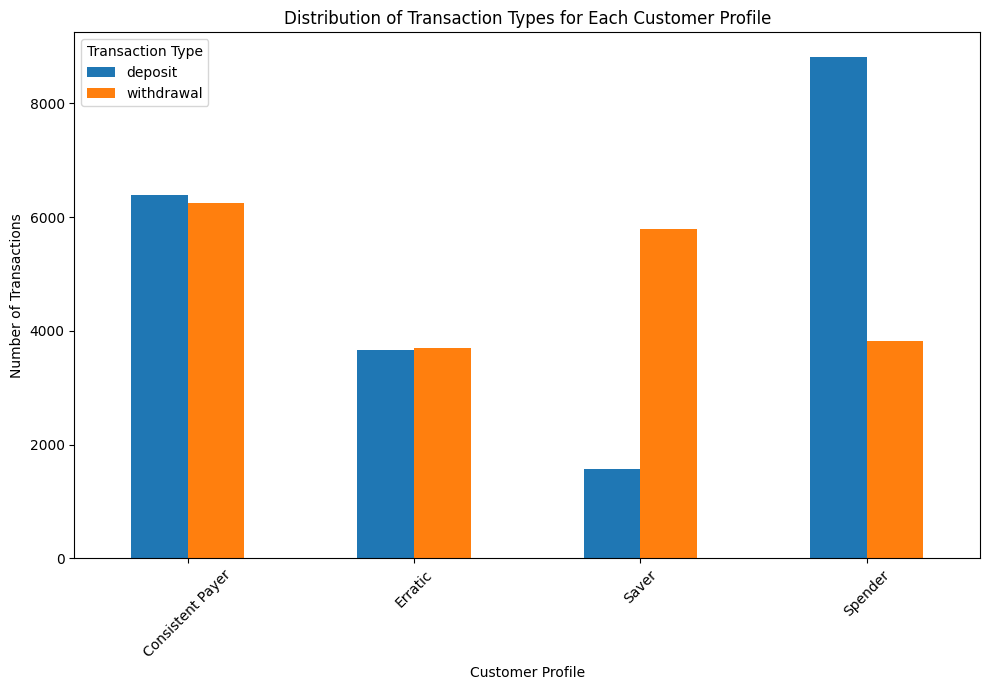

In [17]:
grouped = df.groupby(['profile', 'transaction_type']).size().unstack()

# Plot - Distribution of Transaction Types for Each Customer Profile
grouped.plot(kind='bar', stacked=False, figsize=(10, 7))
plt.title("Distribution of Transaction Types for Each Customer Profile")
plt.xlabel("Customer Profile")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Transaction Type")
plt.show()

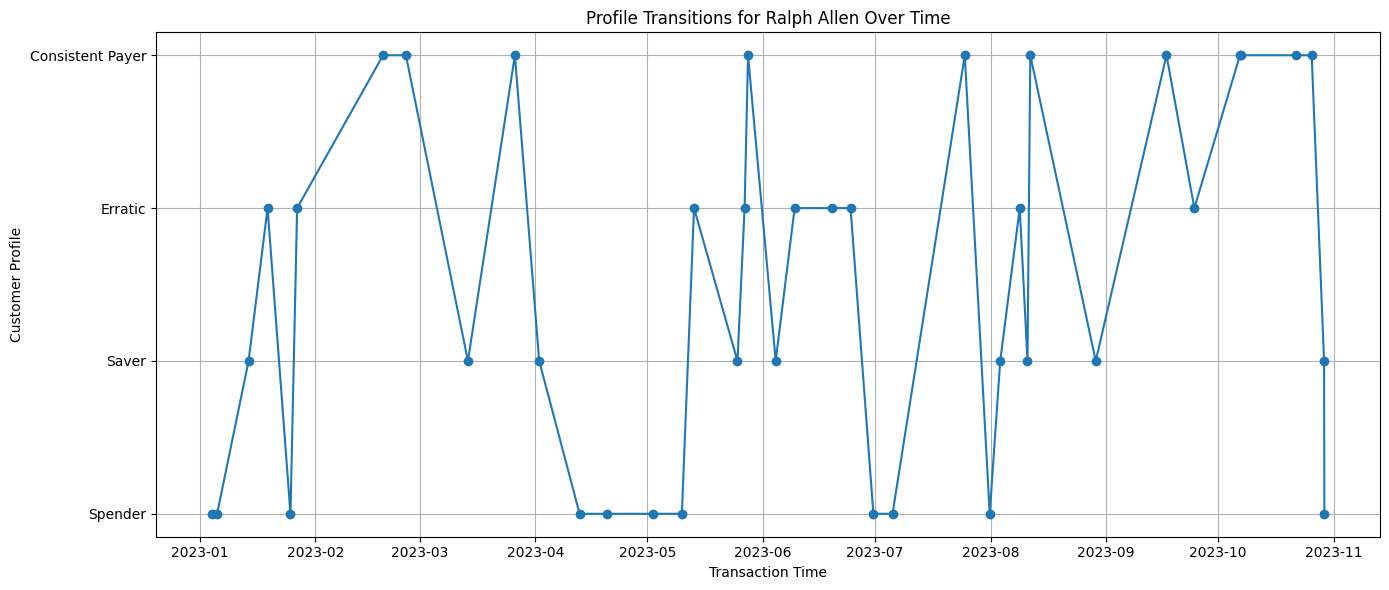

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV
df = pd.read_csv('new_transaction_data_profiles.csv')

# Convert 'time_transaction' to datetime
df['time_transaction'] = pd.to_datetime(df['time_transaction'])

# Selecting data for a specific customer
customer_name = df['customer_name'].iloc[0]
customer_data = df[df['customer_name'] == customer_name]

# Sorting data by time
customer_data = customer_data.sort_values(by='time_transaction')

# If 'profile' column contains categorical data ('Saver', 'Spender', 'Regular Biller', 'Erratic')
# map profiles to integers
profile_mapping = {profile: i for i, profile in enumerate(customer_data['profile'].unique())}
customer_data['mapped_profile'] = customer_data['profile'].map(profile_mapping)

# Plotting profile changes for the customer over time
plt.figure(figsize=(14, 6))
plt.plot(customer_data['time_transaction'], customer_data['mapped_profile'], marker='o', linestyle='-')
plt.title(f'Profile Transitions for {customer_name} Over Time')
plt.xlabel('Transaction Time')
plt.ylabel('Customer Profile')
plt.yticks(list(profile_mapping.values()), list(profile_mapping.keys()))  # Set y-axis ticks to mapped profile values and labels
plt.grid(True)
plt.tight_layout()
plt.show()